<a href="https://colab.research.google.com/github/unnimaya-vu/unnimaya-vu/blob/main/Wine_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load teh dataset
wine_data = pd.read_csv('/content/winequality-red.csv')

In [ ]:
#show up the rows and columns
wine_data.shape

(1599, 12)

In [ ]:
#Print the first 5 rows of the data frame
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#check the missing value
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#data analysis and visualization
#satistical measures
wine_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


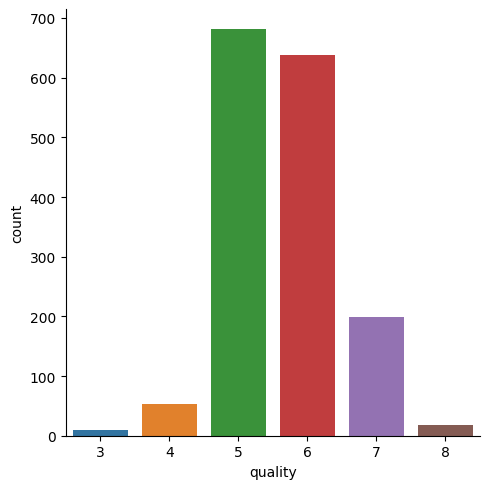

In [ ]:
#number of values of the dataset
sns.catplot(x='quality', data=wine_data, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

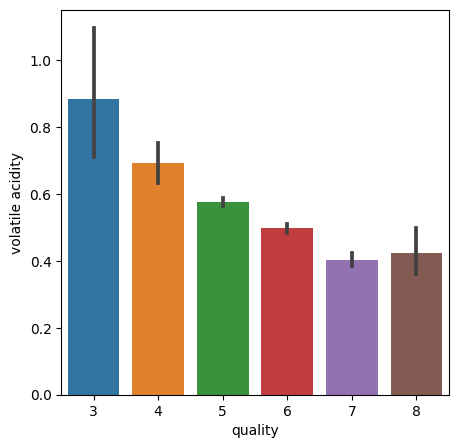

In [ ]:
#plot the graph for volatile acidity and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

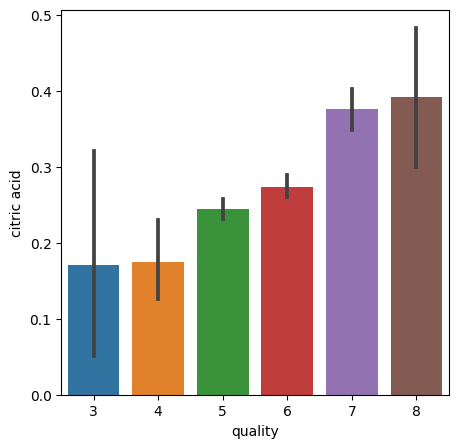

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data=wine_data)

In [ ]:
#find the correlation for which feuture is positively correlated and negative correlated
correlation = wine_data.corr()

<Axes: >

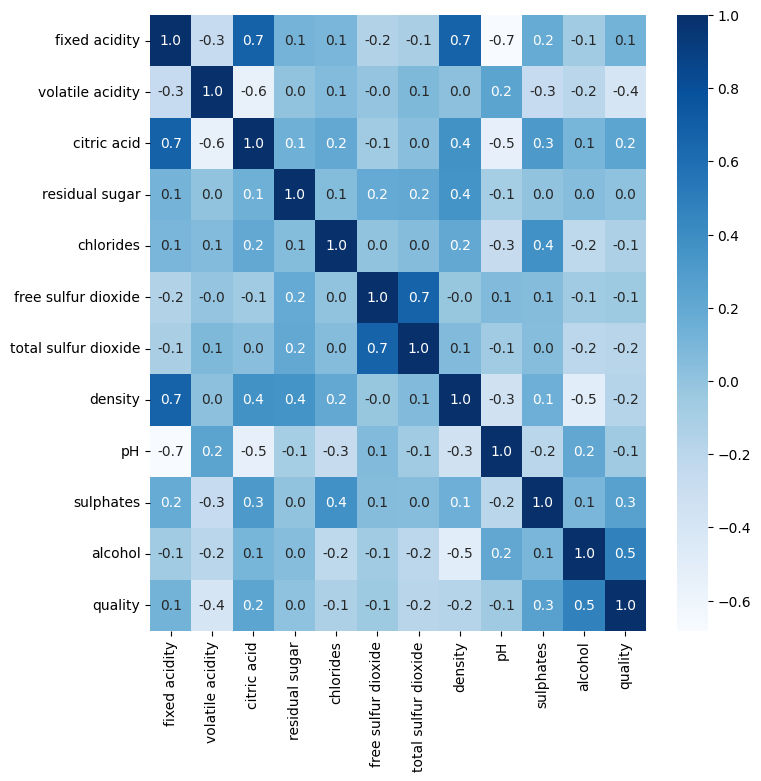

In [ ]:
#Construct heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, fmt = '0.1f', annot = True, cmap='Blues')

In [ ]:
#seprate the data and label
X =  wine_data.drop(columns ='quality',axis =1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#Label Binerization
Y = wine_data['quality'].apply(lambda y_value :1 if y_value > 7 else 0 )
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
#Train ans test data
X_train,X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state= 2)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
#load the model
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#model Evalution
train_predict = model.predict(X_test)
test_data_accuracy= accuracy_score(train_predict,Y_test)
print('Accuracy Score :' ,test_data_accuracy)

Accuracy Score : 0.9875


In [ ]:
#bulid the predictive model
input_data = (7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8)
numpy_array = np.asarray(input_data) # Convert numpy array
reshape_array = numpy_array.reshape(1,-1) #reshape array
prediction = model.predict(reshape_array)
print(prediction)
if (prediction[0] == 1):
  print ("The wine quality is good")
else:
  print ("the wine quality is bad")

[0]
the wine quality is bad
